In [431]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random 


In [432]:
data_i = pd.ExcelFile('temp.xlsx')


In [433]:
data_img = pd.read_excel(data_i) 


In [434]:
#print((data)) 
data_img.shape
#data3.shape
#data.iloc[0]
#data_img[500:1000]

(5000, 785)

Separat Numbers

In [435]:
f0 = []
f1 = []
f2 = []
f3 = []
f4 = []
f5 = []
f6 = []
f7 = []
f8 = []
f9 = []

for i in range(5000):
  j = (data_img.iloc[i][1:785])
  #print(j)
  b=np.array(j).reshape(28,28).T
  if i <500:
    f0.append(b)
  elif 499<i<1000:
    f1.append(b)
  elif 999<i<1500:
    f2.append(b)
  elif 1499<i<2000:
    f3.append(b)
  elif 1999<i<2500:
    f4.append(b)
  elif 2499<i<3000:
    f5.append(b)
  elif 2999<i<3500:
    f6.append(b)
  elif 3499<i<4000:
    f7.append(b)
  elif 3999<i<4500:
    f8.append(b)
  elif 4499<i<5000:
    f9.append(b)

# #print(len(f0))
# #print(len(f1))
# #print(len(f2))
# #print(len(f3))
# #print(len(f4))
# #print(len(f5))
# #print(len(f6))
# #print(len(f7))
# #print(len(f8))
# #print(len(f9))

#for i in range(10):
  #ax = sns.heatmap(f2[i])
  #plt.figure()

Shuffle 

In [436]:
data0 = data_img[0:400]
data2 = data_img[400:500]
data1 = data_img[500:900]
data3 = data_img[900:1000]
data4 = data_img[3500:3600]
data5 = data_img[4500:4600]
#print(len(data1))
data_training = data0.append(data1)
data_testing = data2.append(data3)
data_challenge = data4.append(data5)
#print(data_testing)
data_training = data_training.sample(frac=1)
data_testing = data_testing.sample(frac=1)
data_challenge = data_challenge.sample(frac=1)
#print(data_testing.drop(columns=['L']))
#print(len(data_testing))
#print(data4)
#print(data_training.iloc[2])



Teaching Input

In [437]:
z = np.array(data_training.iloc[:,0])
#print(z)
#print('z:',z[0])
#print(data_training)
data_training.iloc[0,:1]

L    1.0
Name: 626, dtype: float64

Initial Weights

Train

In [438]:
w= np.random.uniform(0,0.5,784)
w_copy = w

s_training = [0 for f in range(800)]
y_training = [0 for f in range(800)]
s_testing = [0 for f in range(200)]
y_testing = [0 for f in range(200)]
s_challenge = [0 for f in range(200)]
y_challenge = [0 for f in range(200)]
n = 0.01 #LEARNING RATE

for j in range (41): #J IS EPOCH 
  for i in range(800):
      s_training[i] = np.dot(data_training.iloc[i,1:],w)
      y_training[i] = z[i]
      #print(i)
      w = w + n*y_training[i]*(data_training.iloc[i,1:] - w)
      #print(w)




Test

In [439]:
y_all = []
for j in range(40): #THETA
  y_testing=np.zeros(200)
  for i in range(200):
      s_testing[i] = np.dot(data_testing.iloc[i,1:],w)
      #print(s_testing[i])
      if s_testing[i] > j:
        y_testing[i] = 1
      else:
        y_testing[i] = 0

  y_all.append(y_testing)

# for i in range(40):
#   print(np.array(data_testing.iloc[:,0]))
#   print(y_all[i])
#   print("==========================================================================================")
# print(len(y_testing))  

print(len(y_all))




40


Evaluation

In [ ]:
tn = np.zeros(40)
tp = np.zeros(40)
fn = np.zeros(40)
fp = np.zeros(40)
p = np.zeros(40)
r = np.zeros(40)
f1 = np.zeros(40)

for i in range(40):
  tn[i], fp[i], fn[i], tp[i] = confusion_matrix((data_testing.iloc[:,0]),y_all[i]).ravel()
  print("TN:",tn[i],"FP",fp[i],"FN:",fn[i],"TP:",tp[i])
  p[i] = (tp[i]/(tp[i]+fp[i]))
  r[i] = (tp[i]/(tp[i]+fn[i]))
  f1[i] = 2*((p[i]*r[i])/(p[i]+r[i]))
  print("p=",p[i],"r=",r[i],"f1=",f1[i])

[100. 100. 100. 100. 100. 100. 100.  99.  98.  96.  94.  91.  90.  85.
  79.  67.  58.  52.  47.  40.  35.  27.  22.  12.   9.   8.   5.   4.
   4.   4.   3.   1.   1.   1.   1.   1.   0.   0.   0.   0.]
[100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.  99.
  98.  98.  96.  95.  94.  90.  82.  80.  78.  74.  69.  67.  58.  54.
  48.  44.  38.  30.  27.  23.  18.  14.  10.   7.   4.   2.]


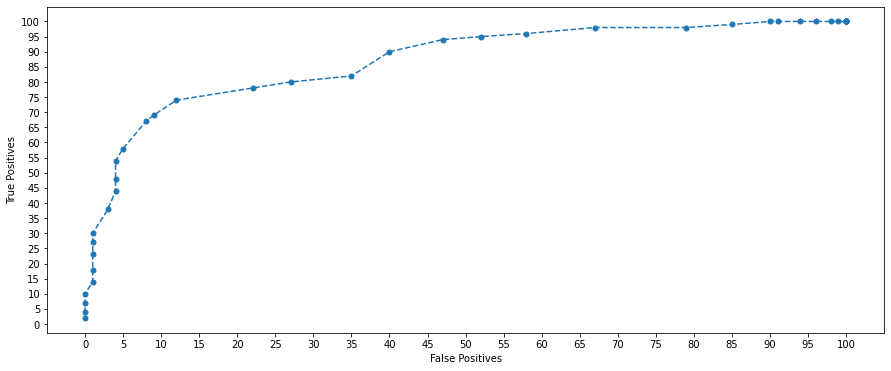

In [476]:
plt.figure(figsize=(15,6))
plt.xlabel("False Positives")
plt.ylabel("True Positives")
plt.xticks(range(0,101,5))
plt.yticks(range(0,101,5))
plt.plot(fp,tp,linestyle='dashed', marker='o', markersize=5)
print(fp)
print(tp)
# [18,79]

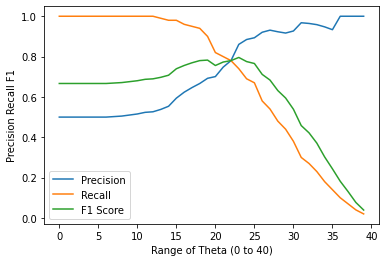

In [499]:
plt.plot(range(40),p,label='Precision')
plt.plot(range(40),r,label='Recall')
plt.plot(range(40),f1,label='F1 Score')
plt.xlabel('Range of Theta (0 to 40)')
plt.ylabel('Precision Recall F1')
plt.legend()
plt.show()

Heat Map

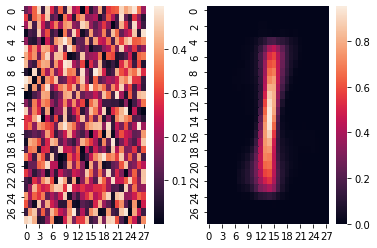

In [468]:
from sklearn.metrics import plot_confusion_matrix
fig, (ax1, ax2) = plt.subplots(1,2)
bx=sns.heatmap(w_copy.reshape(28,28).T,ax=ax1)
a =  np.array(w).reshape(28,28).T
cx = sns.heatmap(a,ax=ax2)
plt.show()
#print(a.shape)

Challenge Set

In [472]:
y_all_C = []

y_challenge=np.zeros(200)
for i in range(200):
    s_challenge[i] = np.dot(data_challenge.iloc[i,1:],w)
    #print(s_testing[i])
    if s_challenge[i] > 23:
      y_challenge[i] = 1
    else:
      y_challenge[i] = 0

y_all_C = (y_challenge)

In [473]:
x = (data_challenge.iloc[:,0])


sevens_ones = np.where((x ==7)& y_all_C == 1 )
sevens_ones = len(np.array(sevens_ones)[0])
nine_ones = np.where((x==9) & (y_all_C == 1 ))
nine_ones = len(nine_ones[0])
sevens_zeros = np.where((x==7) & (y_all_C == 0 ))
sevens_zeros = len(sevens_zeros[0])
nine_zeros = np.where((x==9) & (y_all_C == 0 ))
nine_zeros = len(nine_zeros[0])

print(sevens_ones)
print()
print((sevens_zeros))
print()
print((nine_ones))
print()
print((nine_zeros))


32

68

29

71


In [474]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['', 'Original 7', 'Original 9']),
                 cells=dict(values=[['Detected 1','Detected 0'], [sevens_ones,sevens_zeros], [nine_ones,nine_zeros]]))
                     ])
fig.show()

Question 2

In [489]:
w2= np.random.uniform(0,0.5,784)
w_copy2 = w2
z2 = np.array(data_training.iloc[:,0])

s_training2 = [0 for f in range(800)]
y_training2 = [0 for f in range(800)]
s_testing2 = [0 for f in range(200)]
y_testing2 = [0 for f in range(200)]
s_challenge2 = [0 for f in range(200)]
y_challenge2 = [0 for f in range(200)]
n = 0.01

for j in range (41):
  for i in range(800):
      s_training2[i] = np.dot(data_training.iloc[i,1:],w2)
      y_training2[i] = z2[i]
      #print(i)
      w2 = w2 + n*(data_training.iloc[i,1:])*(y_training2[i] - w2)
      #print(w)

In [490]:
y_all2 = []
for j in range(40):
  y_testing2=np.zeros(200)
  for i in range(200):
      s_testing2[i] = np.dot(data_testing.iloc[i,1:],w2)
      #print(s_testing[i])
      if s_testing2[i] > j:
        y_testing2[i] = 1
      else:
        y_testing2[i] = 0

  y_all2.append(y_testing2)


In [ ]:
tn2 = np.zeros(40)
tp2 = np.zeros(40)
fn2 = np.zeros(40)
fp2 = np.zeros(40)
p2 = np.zeros(40)
r2 = np.zeros(40)
f12 = np.zeros(40)

for i in range(40):
  tn2[i], fp2[i], fn2[i], tp2[i] = confusion_matrix((data_testing.iloc[:,0]),y_all2[i]).ravel()
  print("TN:",tn2[i],"FP",fp2[i],"FN:",fn2[i],"TP:",tp2[i])
  p2[i] = (tp2[i]/(tp2[i]+fp2[i]))
  r2[i] = (tp2[i]/(tp2[i]+fn2[i]))
  f12[i] = 2*((p2[i]*r2[i])/(p2[i]+r2[i]))
  print("p=",p2[i],"r=",r2[i],"f1=",f12[i])

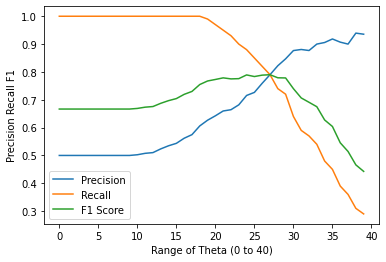

In [497]:
plt.plot(range(40),p2,label='Precision')
plt.plot(range(40),r2,label='Recall')
plt.plot(range(40),f12,label='F1 Score')
plt.xlabel('Range of Theta (0 to 40)')
plt.ylabel('Precision Recall F1')
plt.legend()
plt.show()

[100. 100. 100. 100. 100. 100. 100. 100. 100. 100.  99.  97.  96.  91.
  87.  84.  78.  74.  65.  59.  54.  49.  47.  42.  35.  32.  26.  21.
  16.  13.   9.   8.   8.   6.   5.   4.   4.   4.   2.   2.]
[100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100.  99.  97.  95.  93.  90.  88.  85.  82.  79.
  74.  72.  64.  59.  57.  54.  48.  45.  39.  36.  31.  29.]


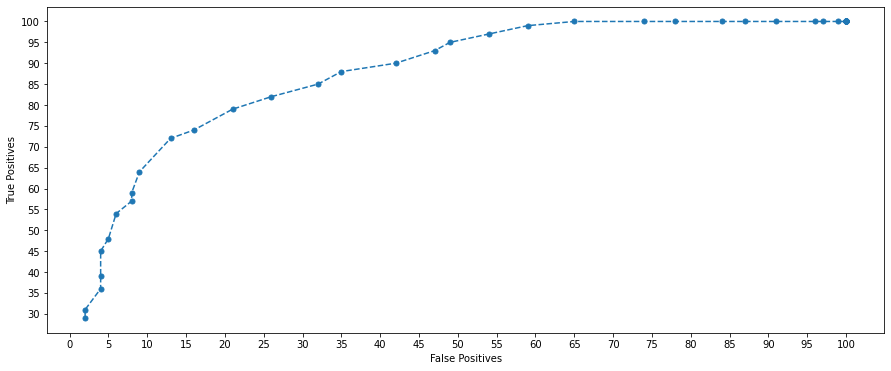

In [504]:
plt.figure(figsize=(15,6))
plt.xlabel("False Positives")
plt.ylabel("True Positives")
plt.xticks(range(0,101,5))
plt.yticks(range(0,101,5))
plt.plot(fp2,tp2,linestyle='dashed', marker='o', markersize=5)
print(fp2)
print(tp2)
# [18,79]

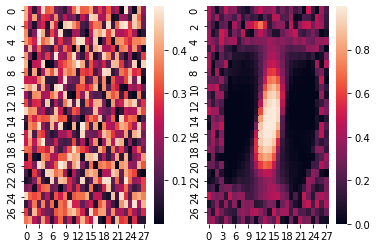

<Figure size 432x288 with 0 Axes>

In [495]:
from sklearn.metrics import plot_confusion_matrix
fig, (ax1, ax2) = plt.subplots(1,2)
bx2=sns.heatmap(w_copy2.reshape(28,28).T,ax=ax1)
a2 =  np.array(w2).reshape(28,28).T
plt.figure()
cx2 = sns.heatmap(a2,ax=ax2)

In [453]:
y_all_C2 = []

y_challenge2=np.zeros(200)
for i in range(200):
    s_challenge2[i] = np.dot(data_challenge.iloc[i,1:],w2)
    #print(s_testing[i])
    if s_challenge2[i] > 21:
      y_challenge2[i] = 1
    else:
      y_challenge2[i] = 0

y_all_C2 = (y_challenge2)

In [454]:
x = (data_challenge.iloc[:,0])


sevens_ones2 = np.where((x ==7)& y_all_C2 == 1 )
sevens_ones2 = len(np.array(sevens_ones2)[0])
nine_ones2 = np.where((x==9) & (y_all_C2 == 1 ))
nine_ones2 = len(nine_ones2[0])
sevens_zeros2 = np.where((x==7) & (y_all_C2 == 0 ))
sevens_zeros2 = len(sevens_zeros2[0])
nine_zeros2 = np.where((x==9) & (y_all_C2 == 0 ))
nine_zeros2 = len(nine_zeros2[0])

# print(sevens_ones2)
# print()
# print((sevens_zeros2))
# print()
# print((nine_ones2))
# print()
# print((nine_zeros2))

In [501]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['', 'Original 7', 'Original 9']),
                 cells=dict(values=[['Detected 1','Detected 0'], [sevens_ones2,sevens_zeros2], [nine_ones2,nine_zeros2]]))
                     ])
fig.show()